In [4]:
import pickle


with open('imit_ucb/assets/envDiscreteGaussianGridworld-v0type1noiseE0.0/airl/reward_history/1_2.p', 'rb') as file:
    array = pickle.load(file)

array['rewards']

[np.float64(-781.8454909185509),
 np.float64(-760.0807916614322),
 np.float64(-733.9088922606956),
 np.float64(-732.3505431950632),
 np.float64(-714.7789297558054),
 np.float64(-740.9096352677287),
 np.float64(-732.640948864134),
 np.float64(-751.7169807279377),
 np.float64(-776.6163828981228),
 np.float64(-779.2896375061036),
 np.float64(-781.646200972085),
 np.float64(-763.9773421508377),
 np.float64(-774.169803698408),
 np.float64(-764.684710091976),
 np.float64(-734.5927076044148),
 np.float64(-790.488127981635),
 np.float64(-758.7352520421816),
 np.float64(-755.0723894124691),
 np.float64(-784.591727516854),
 np.float64(-899.6429978048569),
 np.float64(-856.5777549212112),
 np.float64(-861.1894613971888),
 np.float64(-795.153164982849),
 np.float64(-949.4621405044076),
 np.float64(-908.6101763870913),
 np.float64(-854.7457643486305),
 np.float64(-931.511345334265),
 np.float64(-717.2052293113749),
 np.float64(-768.9893362205935),
 np.float64(-624.2294693152023)]

In [14]:
with open('imit_ucb/assets/envDiscreteGaussianGridworld-v0type1noiseE0.0/gail/reward_history/0_2.p', 'rb') as file:
    array = pickle.load(file)

array['rewards'], array['episodes']

([np.float64(-772.2633127171227),
  np.float64(-740.5023481251985),
  np.float64(-738.763476236514),
  np.float64(-737.824848264413),
  np.float64(-790.4129575736308),
  np.float64(-687.7373680757955),
  np.float64(-686.2706253704384),
  np.float64(-654.0328684011408),
  np.float64(-661.4394009428445),
  np.float64(-681.2809851338102),
  np.float64(-683.3165869550566),
  np.float64(-723.1101175739806),
  np.float64(-690.0442275772876),
  np.float64(-650.2065395789118),
  np.float64(-624.8010078499808),
  np.float64(-629.6947994226983),
  np.float64(-621.1183928717361),
  np.float64(-594.3398757784522),
  np.float64(-587.6165335916345),
  np.float64(-619.683455460141),
  np.float64(-652.0136225068878),
  np.float64(-1109.8338843319461),
  np.float64(-967.885781698696),
  np.float64(-679.5451454666589),
  np.float64(-713.9112616193867),
  np.float64(-699.8163747747781),
  np.float64(-667.9063374713154),
  np.float64(-640.3122294088755),
  np.float64(-639.9540195938467),
  np.float64(-633

In [36]:
with open('imit_ucb/assets/envDiscreteGaussianGridworld-v0type1noiseE0.0/gail/reward_history/0_2.p', 'rb') as file:
    array = pickle.load(file)
len(array['rewards'])


30

In [37]:
with open('imit_ucb/assets/envDiscreteGaussianGridworld-v0type1noiseE0.0/gail/reward_history/1_2.p', 'rb') as file:
    array = pickle.load(file)
len(array['rewards'])


17

In [38]:
with open('imit_ucb/assets/envDiscreteGaussianGridworld-v0type1noiseE0.0/gail/reward_history/2_2.p', 'rb') as file:
    array = pickle.load(file)
len(array['rewards'])


30

In [39]:
with open('imit_ucb/assets/envDiscreteGaussianGridworld-v0type1noiseE0.0/gail/reward_history/3_2.p', 'rb') as file:
    array = pickle.load(file)
len(array['rewards'])


30

In [40]:
with open('imit_ucb/assets/envDiscreteGaussianGridworld-v0type1noiseE0.0/gail/reward_history/4_2.p', 'rb') as file:
    array = pickle.load(file)
len(array['rewards'])


30

In [54]:
with open('assets/envDiscreteGaussianGridworld-v0type1noiseE0.0/expert_trajs/trajs16.pkl', 'rb') as file:
    array = pickle.load(file)


print(array.keys()) # dict_keys(['states', 'actions'])

print(len(array['states'])) # 2
print(len(array['actions'])) # 2

print(len(array['states'][0])) # up to 10000 depends how many steps we had in the specific episode
print(len(array['actions'][0])) # up to 10000 depends how many steps we had in the specific episode

print(len(array['states'][0][0])) # 8 features for the state
print((array['actions'][0])) # 4 possible actions (0, 1, 2, 3)

dict_keys(['states', 'actions'])
2
2
392
391
8
[np.int64(3), np.int64(3), np.int64(3), np.int64(3), np.int64(3), np.int64(3), np.int64(3), np.int64(3), np.int64(3), np.int64(3), np.int64(3), np.int64(3), np.int64(3), np.int64(3), np.int64(3), np.int64(3), np.int64(3), np.int64(3), np.int64(3), np.int64(3), np.int64(3), np.int64(3), np.int64(3), np.int64(0), np.int64(3), np.int64(3), np.int64(0), np.int64(3), np.int64(3), np.int64(0), np.int64(3), np.int64(3), np.int64(0), np.int64(3), np.int64(3), np.int64(0), np.int64(3), np.int64(3), np.int64(0), np.int64(3), np.int64(3), np.int64(0), np.int64(3), np.int64(3), np.int64(0), np.int64(3), np.int64(3), np.int64(0), np.int64(3), np.int64(3), np.int64(0), np.int64(3), np.int64(3), np.int64(0), np.int64(3), np.int64(3), np.int64(0), np.int64(3), np.int64(3), np.int64(0), np.int64(3), np.int64(3), np.int64(3), np.int64(0), np.int64(3), np.int64(3), np.int64(0), np.int64(3), np.int64(3), np.int64(0), np.int64(3), np.int64(3), np.int64(3), np.

In [2]:
import numpy as np
import plotly.graph_objects as go

# Define the cost function
def cost_function(state, terminal_area):
    x, y = state
    cost = -(x - 1)**2 - (y + 1)**2 - 80 * np.exp(-8 * x**2 - 8 * y**2)
    if (terminal_area[0, 0] <= x <= terminal_area[0, 1] and
        terminal_area[1, 0] <= y <= terminal_area[1, 1]):
        cost += 100
    return cost

# Create a grid of state values, restricted to the region [-1, 1]
x_vals = np.linspace(-1, 1, 100)
y_vals = np.linspace(-1, 1, 100)
X, Y = np.meshgrid(x_vals, y_vals)

# Define the terminal area
terminal_area = np.array([[0.95, 1.0], [-1.0, -0.95]])

# Calculate the cost for each (x, y) pair
Z = np.array([[cost_function((x, y), terminal_area) for x in x_vals] for y in y_vals])

# Create the interactive 3D surface plot using plotly
fig = go.Figure(data=[go.Surface(z=Z, x=X, y=Y, colorscale='Viridis')])

# Customize the layout
fig.update_layout(
    title='Interactive Cost Function Surface (Region [-1, 1])',
    scene=dict(
        xaxis_title='State[0]',
        yaxis_title='State[1]',
        zaxis_title='Cost',
    ),
)

# Show the plot
fig.show()


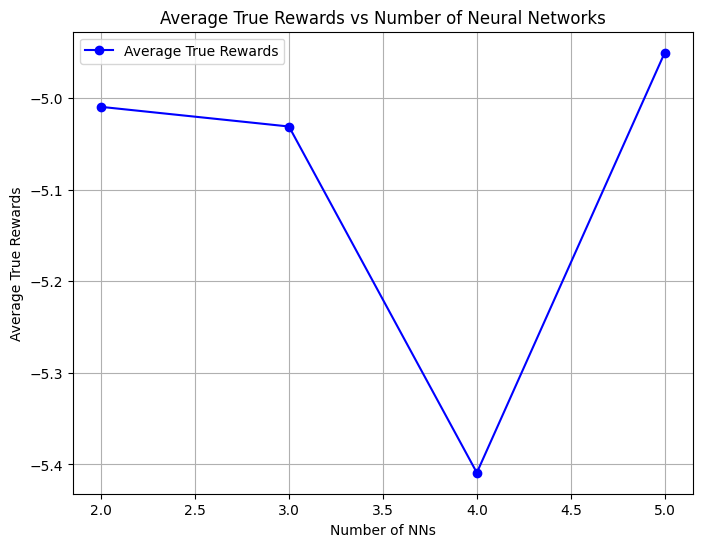

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file
csv_file = 'runs/true_rewards.csv'  # Replace with your actual file path
data = pd.read_csv(csv_file)

# Group by 'num_of_NNs' and calculate the average 'true_rewards'
avg_data = data.groupby('num_of_NNs', as_index=False)['true_rewards'].mean()

# Plotting the data
plt.figure(figsize=(8, 6))
plt.plot(avg_data['num_of_NNs'], avg_data['true_rewards'], marker='o', linestyle='-', color='b', label='Average True Rewards')

# Add titles and labels
plt.title('Average True Rewards vs Number of Neural Networks')
plt.xlabel('Number of NNs')
plt.ylabel('Average True Rewards')

# Show grid and legend
plt.grid(True)
plt.legend()

# Show the plot
plt.show()
